# Fealpy 中的网格

网格是进行有限元计算的基础，本文档介绍 Fealpy 中网格的数据结构，生成算法及可视化。

## 三角形网格的数据结构

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from fealpy.mesh.TriangleMesh import TriangleMesh
%matplotlib inline

In [2]:
# 网格顶点坐标数组
point = np.array([
    (0, 0), 
    (1, 0), 
    (1, 1),
    (0, 1)], dtype=np.float)
# 单元顶点编号数组
cell = np.array([
    (1, 2, 0), 
    (3, 0, 2)], dtype=np.int)

tmesh = TriangleMesh(point, cell) # 三角形网格实例

In [3]:
print(tmesh.node)
print(tmesh.ds.edge)
print(tmesh.ds.cell)
print(tmesh.ds.edge2cell)
print(tmesh.ds.cell_to_edge())

[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]
[[0 1]
 [2 0]
 [3 0]
 [1 2]
 [2 3]]
[[1 2 0]
 [3 0 2]]
[[0 0 1 1]
 [0 1 0 0]
 [1 1 2 2]
 [0 0 2 2]
 [1 1 1 1]]
[[1 0 3]
 [1 4 2]]


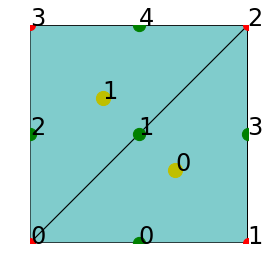

In [4]:
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
tmesh.find_node(axes, showindex=True)
tmesh.find_edge(axes, showindex=True)
tmesh.find_cell(axes, showindex=True)
plt.show()

## 网格生成

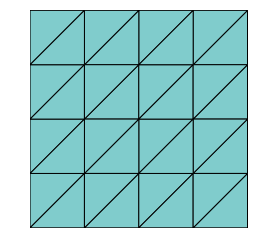

In [5]:
from fealpy.mesh.simple_mesh_generator import squaremesh
mesh = squaremesh(0, 1, 0, 1, r=2)
# r is the number of uniform refinement
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

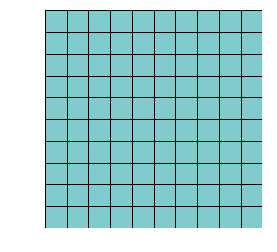

In [6]:
from fealpy.mesh.simple_mesh_generator import rectangledomainmesh
box = [-1, 1, -1, 1]
# the meshtype can be tri, quad, polygon
mesh = rectangledomainmesh(box, nx=10, ny=10, meshtype='quad')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

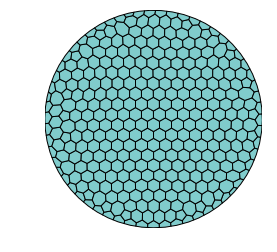

In [7]:
from fealpy.mesh.simple_mesh_generator import unitcircledomainmesh
mesh = unitcircledomainmesh(0.1, meshtype='polygon')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

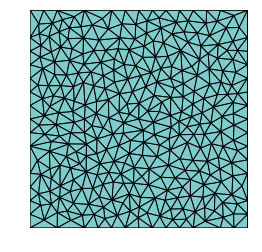

In [8]:
import numpy as np
from meshpy.triangle import MeshInfo, build
from fealpy.mesh.TriangleMesh import TriangleMesh
mesh_info = MeshInfo()
mesh_info.set_points([(0,0), (1,0), (1,1), (0,1)])
mesh_info.set_facets([[0,1], [1,2], [2,3], [3,0]])  
h = 0.05
mesh = build(mesh_info, max_volume=h**2)
point = np.array(mesh.points, dtype=np.float)
cell = np.array(mesh.elements, dtype=np.int)
tmesh = TriangleMesh(point, cell)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.show()

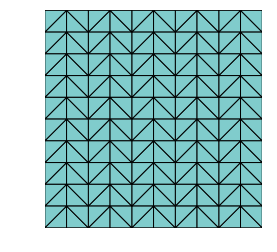

In [9]:
from fealpy.mesh.simple_mesh_generator import fishbone
box = [-1, 1, -1, 1]
# the meshtype can be tri, quad, polygon
mesh = fishbone(box)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

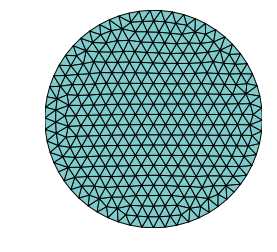

In [17]:
from fealpy.mesh.simple_mesh_generator import unitcircledomainmesh
# the meshtype can be tri, quad, polygon
mesh = unitcircledomainmesh(0.1, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()